In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import shapiro, normaltest
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [127]:
data=pd.read_csv('./各產業日最大值.csv')
data


,date,春天,夏天,秋天,冬天,放假,沒放假,Xinyi_HT,Xinyi_AT,Xinyi_LT,...,Jian_AT,Jian_LT,Zhushan_HT,Zhushan_AT,Zhushan_LT,石化業該日最高用電量,金屬製造該日最高用電量,資訊電子該日最高用電量,綜合服務該日最高用電量,民生工業該日最高用電量
0,20180101,0,0,0,1,1,0,17.5,16.302083,15.0,...,17.637500,15.9,24.5,18.104167,13.5,575101.8090,497303.7740,1185964.275,5.978840e+05,444946.9005
1,20180102,0,0,0,1,0,1,21.8,19.447917,16.9,...,17.958333,16.6,25.5,19.004167,14.0,729178.5080,584423.5030,1301090.294,7.367569e+05,779115.3055
2,20180103,0,0,0,1,0,1,23.1,20.758333,19.2,...,19.208333,16.3,24.7,19.150000,15.2,743523.6250,606847.0970,1283734.018,7.493215e+05,814767.1165
3,20180104,0,0,0,1,0,1,23.2,20.114583,17.7,...,19.220833,16.8,21.3,18.427083,17.0,758083.7900,587112.2090,1290648.630,7.536198e+05,813079.2725
4,20180105,0,0,0,1,0,1,17.3,16.387500,15.4,...,18.883333,17.2,21.4,18.608333,16.9,747756.1780,628907.8110,1277865.262,7.465036e+05,813494.7535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,20220626,0,1,0,0,1,0,33.5,29.162500,24.8,...,28.008333,24.4,33.4,27.491667,23.1,755343.5677,535426.1127,1894896.866,7.953759e+05,503496.7486
1637,20220627,0,1,0,0,0,1,34.0,29.116667,26.2,...,28.195833,25.4,32.6,28.720833,24.2,893151.7240,602865.2539,1996146.458,1.054524e+06,867428.7208
1638,20220628,0,1,0,0,0,1,33.1,29.637500,25.7,...,28.158333,25.0,32.1,27.616667,24.2,909781.5083,620104.1358,2021454.327,1.070062e+06,877454.0934
1639,20220629,0,1,0,0,0,1,33.2,29.787500,27.5,...,27.841667,25.5,33.0,26.029167,23.9,905122.4876,636173.3609,2011004.936,1.085002e+06,897244.1145


In [128]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data

,date,春天,夏天,秋天,冬天,放假,沒放假,Xinyi_HT,Xinyi_AT,Xinyi_LT,...,Jian_AT,Jian_LT,Zhushan_HT,Zhushan_AT,Zhushan_LT,石化業該日最高用電量,金屬製造該日最高用電量,資訊電子該日最高用電量,綜合服務該日最高用電量,民生工業該日最高用電量
0,2018-01-01,0,0,0,1,1,0,17.5,16.302083,15.0,...,17.637500,15.9,24.5,18.104167,13.5,575101.8090,497303.7740,1185964.275,5.978840e+05,444946.9005
1,2018-01-02,0,0,0,1,0,1,21.8,19.447917,16.9,...,17.958333,16.6,25.5,19.004167,14.0,729178.5080,584423.5030,1301090.294,7.367569e+05,779115.3055
2,2018-01-03,0,0,0,1,0,1,23.1,20.758333,19.2,...,19.208333,16.3,24.7,19.150000,15.2,743523.6250,606847.0970,1283734.018,7.493215e+05,814767.1165
3,2018-01-04,0,0,0,1,0,1,23.2,20.114583,17.7,...,19.220833,16.8,21.3,18.427083,17.0,758083.7900,587112.2090,1290648.630,7.536198e+05,813079.2725
4,2018-01-05,0,0,0,1,0,1,17.3,16.387500,15.4,...,18.883333,17.2,21.4,18.608333,16.9,747756.1780,628907.8110,1277865.262,7.465036e+05,813494.7535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,2022-06-26,0,1,0,0,1,0,33.5,29.162500,24.8,...,28.008333,24.4,33.4,27.491667,23.1,755343.5677,535426.1127,1894896.866,7.953759e+05,503496.7486
1637,2022-06-27,0,1,0,0,0,1,34.0,29.116667,26.2,...,28.195833,25.4,32.6,28.720833,24.2,893151.7240,602865.2539,1996146.458,1.054524e+06,867428.7208
1638,2022-06-28,0,1,0,0,0,1,33.1,29.637500,25.7,...,28.158333,25.0,32.1,27.616667,24.2,909781.5083,620104.1358,2021454.327,1.070062e+06,877454.0934
1639,2022-06-29,0,1,0,0,0,1,33.2,29.787500,27.5,...,27.841667,25.5,33.0,26.029167,23.9,905122.4876,636173.3609,2011004.936,1.085002e+06,897244.1145


In [129]:
# 新增一個名為季節的欄位，並使用1、2、3、4表示春天、夏天、秋天、冬天
data['season'] = pd.cut(data['date'].dt.month, bins=[0, 2, 5, 8, 11], labels=[4, 1, 2, 3], right=False)

# 顯示新增季節欄位後的資料框
print(data)

           date  春天  夏天  秋天  冬天  放假  沒放假  Xinyi_HT   Xinyi_AT  Xinyi_LT  ...  \
0    2018-01-01   0   0   0   1   1    0      17.5  16.302083      15.0  ...   
1    2018-01-02   0   0   0   1   0    1      21.8  19.447917      16.9  ...   
2    2018-01-03   0   0   0   1   0    1      23.1  20.758333      19.2  ...   
3    2018-01-04   0   0   0   1   0    1      23.2  20.114583      17.7  ...   
4    2018-01-05   0   0   0   1   0    1      17.3  16.387500      15.4  ...   
...         ...  ..  ..  ..  ..  ..  ...       ...        ...       ...  ...   
1636 2022-06-26   0   1   0   0   1    0      33.5  29.162500      24.8  ...   
1637 2022-06-27   0   1   0   0   0    1      34.0  29.116667      26.2  ...   
1638 2022-06-28   0   1   0   0   0    1      33.1  29.637500      25.7  ...   
1639 2022-06-29   0   1   0   0   0    1      33.2  29.787500      27.5  ...   
1640 2022-06-30   0   1   0   0   0    1      32.4  29.995833      28.1  ...   

      Jian_LT  Zhushan_HT  Zhushan_AT  

In [130]:
# 提取年份
data['year'] = data['date'].dt.year

# 按照年份、季節進行分組，計算每組的平均值
result = data.groupby(['year', 'season']).mean()
result = result.reset_index()


/var/folders/cj/5fgg13ls5vn_s7__bzz8f7sr0000gn/T/ipykernel_3076/1903793063.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = data.groupby(['year', 'season']).mean()


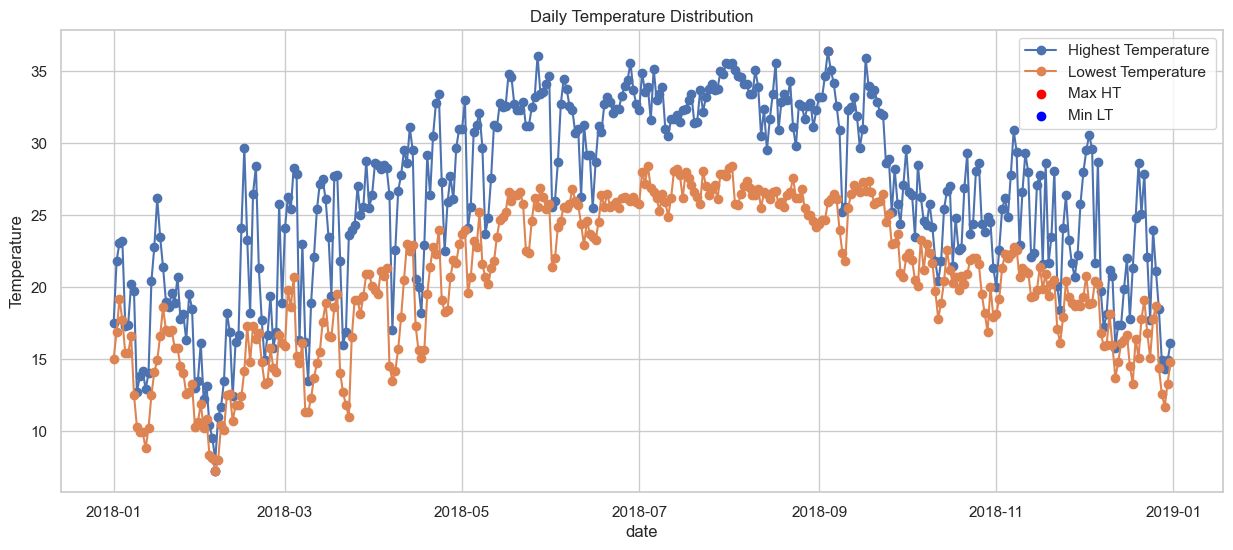

In [131]:

# 選擇2018年的數據
data_2018 = data[data['date'].dt.year == 2018]
# 調整圖表大小
plt.figure(figsize=(15, 6))

plt.plot(data_2018['date'], data_2018['Xinyi_HT'], label='Highest Temperature', marker='o')
plt.plot(data_2018['date'], data_2018['Xinyi_LT'], label='Lowest Temperature', marker='o')

# 標示最高溫和最低溫
plt.scatter(data.loc[data_2018['Xinyi_HT'].idxmax(), 'date'], data_2018['Xinyi_HT'].max(), color='red', label='Max HT')
plt.scatter(data.loc[data_2018['Xinyi_LT'].idxmin(), 'date'], data_2018['Xinyi_LT'].min(), color='blue', label='Min LT')

plt.title('Daily Temperature Distribution')
plt.xlabel('date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


我都先用信義作為範例～

       Xinyi_HT                                                         \
          count       mean       std   min     25%   50%     75%   max   
season                                                                   
4         155.0  19.225161  3.908608   8.7  16.550  19.0  21.800  28.6   
1         445.0  23.037978  5.084260   8.0  19.100  23.0  27.100  34.7   
2         429.0  31.703730  3.828702  16.3  30.200  33.0  34.400  37.3   
3         368.0  30.197690  4.092440  19.9  26.675  31.8  33.425  37.0   

       Xinyi_AT             ...                      Xinyi_LT             \
          count       mean  ...        75%       max    count       mean   
season                      ...                                            
4         155.0  16.711304  ...  18.710417  23.78750    155.0  14.666774   
1         445.0  19.699541  ...  22.366667  28.41875    445.0  17.069888   
2         429.0  27.809581  ...  29.906250  32.47500    429.0  24.945105   
3         368.0  26.96638

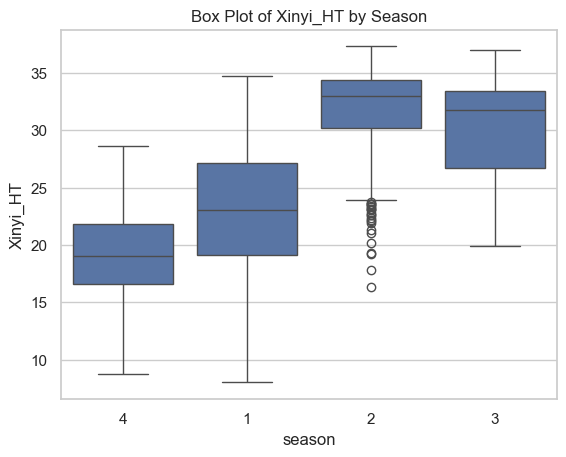

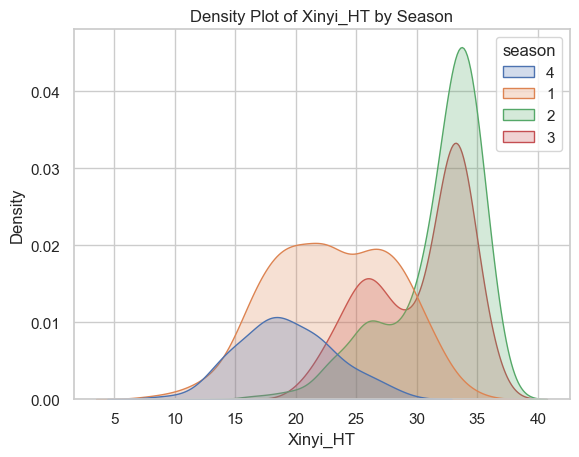

T-test p-value between Season 1 and Season 2: 4.714999438145846e-126


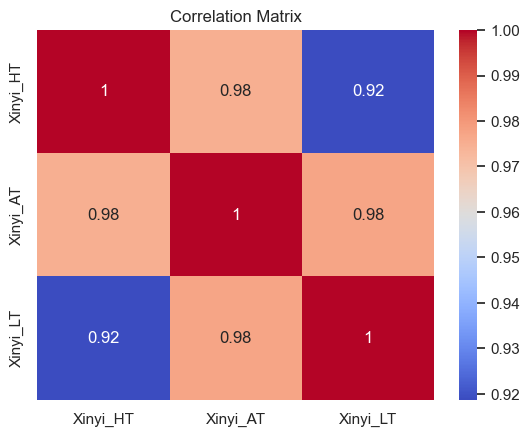

In [132]:

# 描述統計分析
print(data[['Xinyi_HT', 'Xinyi_AT', 'Xinyi_LT', 'season']].groupby('season').describe())

# 盒狀圖
sns.boxplot(x='season', y='Xinyi_HT', data=data)
plt.title('Box Plot of Xinyi_HT by Season')
plt.show()

# 密度圖
sns.kdeplot(data=data, x='Xinyi_HT', hue='season', fill=True)
plt.title('Density Plot of Xinyi_HT by Season')
plt.show()

# 統計檢定 (示例: t-test)
from scipy.stats import ttest_ind
result, p_value = ttest_ind(data[data['season'] == 1]['Xinyi_HT'], data[data['season'] == 2]['Xinyi_HT'])
print(f"T-test p-value between Season 1 and Season 2: {p_value}")

# 相關性分析
correlation_matrix = data[['Xinyi_HT', 'Xinyi_AT', 'Xinyi_LT']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [133]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

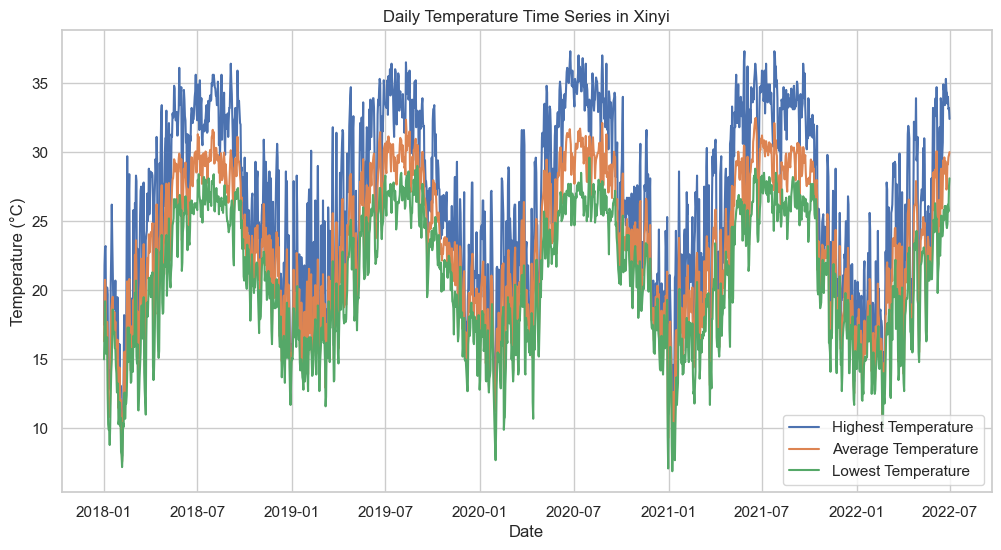

Adata Statistic (Xinyi_HT): -2.737527551527118
p-value: 0.06776642584210102
Critical Values:
   1%: -3.434378077206262
   5%: -2.8633191630261203
   10%: -2.5677171879165286


<Figure size 1200x600 with 0 Axes>

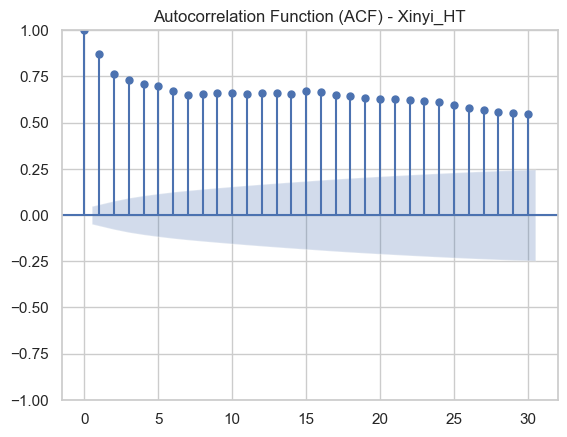

<Figure size 1200x600 with 0 Axes>

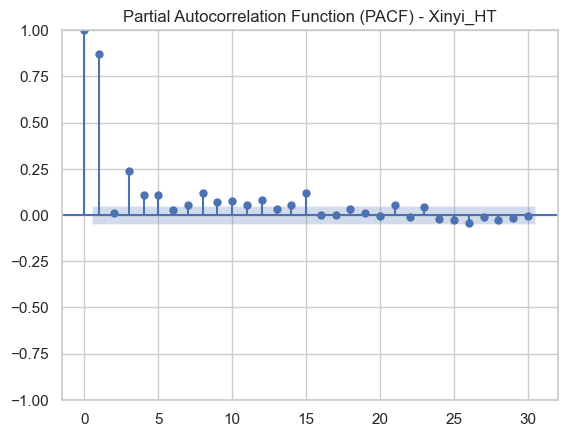

In [134]:
# 假設您的資料框架名為 data，其中包含日期（date）和三個溫度變數（Xinyi_HT, Xinyi_AT, Xinyi_LT）
# 請確保日期是 datetime 格式
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# 繪製每日溫度時間序列折線圖
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Xinyi_HT'], label='Highest Temperature')
plt.plot(data.index, data['Xinyi_AT'], label='Average Temperature')
plt.plot(data.index, data['Xinyi_LT'], label='Lowest Temperature')
plt.title('Daily Temperature Time Series in Xinyi')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# 檢測每日最高溫度的平穩性（Adata檢定）
result_ht = adfuller(data['Xinyi_HT'])
print(f'Adata Statistic (Xinyi_HT): {result_ht[0]}')
print(f'p-value: {result_ht[1]}')
print('Critical Values:')
for key, value in result_ht[4].items():
    print(f'   {key}: {value}')

# 繪製自相關函數（ACF）和偏自相關函數（PACF）圖
plt.figure(figsize=(12, 6))
plot_acf(data['Xinyi_HT'], lags=30, title='Autocorrelation Function (ACF) - Xinyi_HT')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Xinyi_HT'], lags=30, title='Partial Autocorrelation Function (PACF) - Xinyi_HT')
plt.show()

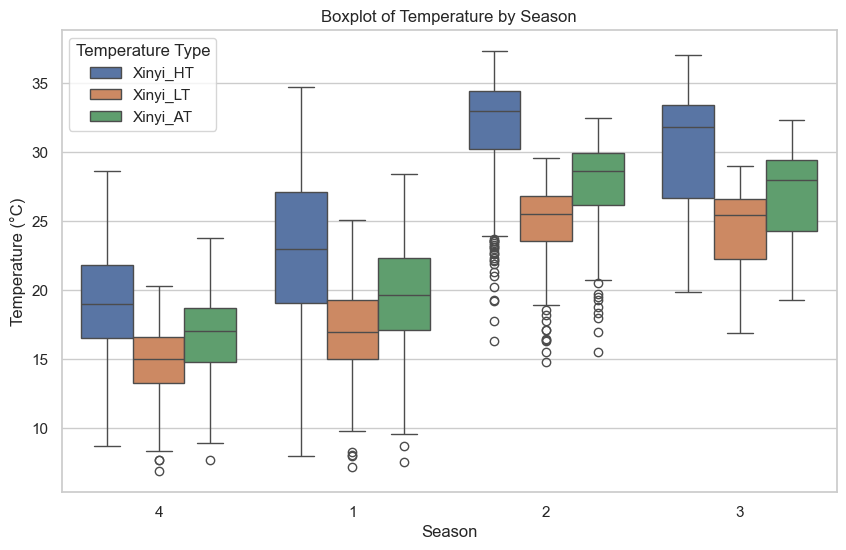

In [135]:
# 繪製盒狀圖
plt.figure(figsize=(10, 6))

# 選擇您感興趣的溫度欄位
temperature_columns = ['Xinyi_HT', 'Xinyi_LT', 'Xinyi_AT']

# 使用Seaborn繪製盒狀圖
sns.boxplot(x='season', y='value', hue='variable', data=pd.melt(data, id_vars='season', value_vars=temperature_columns))

plt.title('Boxplot of Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.legend(title='Temperature Type')
plt.show()



我先用石化業做一個！

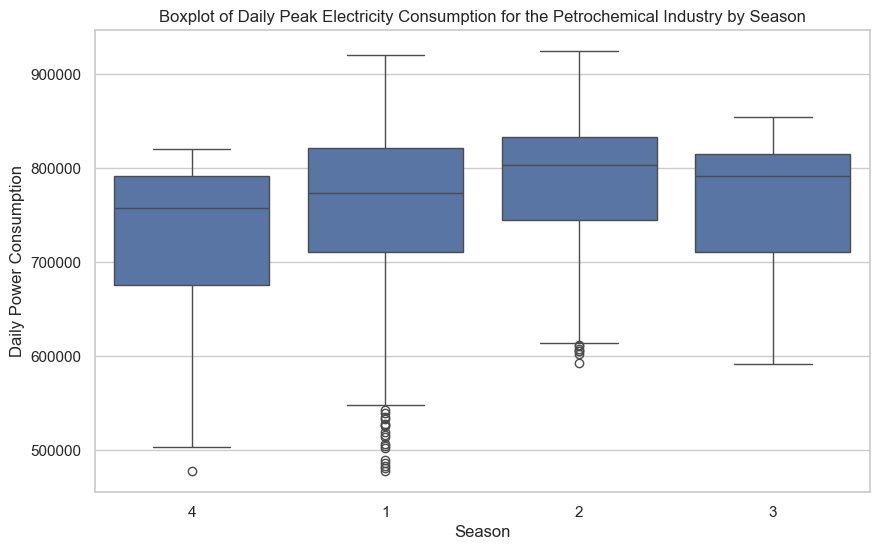

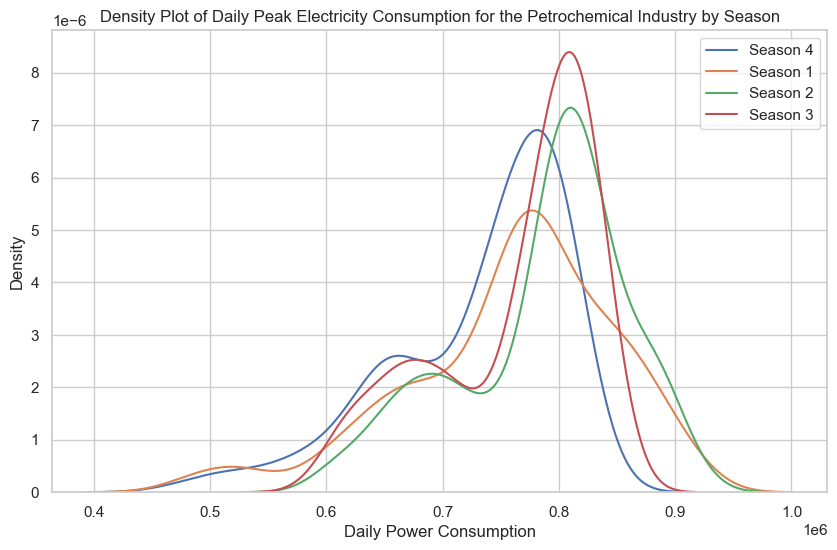

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假設您的資料框架名稱為 data，包含 'season' 和 'daily_power_consumption' 欄位

# 繪製箱形圖
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='石化業該日最高用電量', data=data)
plt.title('Boxplot of Daily Peak Electricity Consumption for the Petrochemical Industry by Season')
plt.xlabel('Season')
plt.ylabel('Daily Power Consumption')
plt.show()


# 繪製密度圖
plt.figure(figsize=(10, 6))
for season in data['season'].unique():
    season_data = data[data['season'] == season]['石化業該日最高用電量']
    sns.kdeplot(season_data, label=f'Season {season}')
plt.title('Density Plot of Daily Peak Electricity Consumption for the Petrochemical Industry by Season')
plt.xlabel('Daily Power Consumption')
plt.ylabel('Density')
plt.legend()
plt.show()
